# **Project Name**    -  Predicting Student Performance



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 - 2210990725
##### **Team Member 2 - 2210990724
##### **Team Member 3 - 2210990712
##### **Team Member 4 - 2210990143


# **Project Summary -**

In this project, the primary objective is to predict student performance based on various factors. To achieve this, we employ modern machine-learning (ML) algorithms and leverage big data management techniques

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


 Develop a model to predict student performance (e.g., grades) based on features such as study time, attendance, socioeconomic status, etc. This project involves data preprocessing, feature selection, and training a regression model using algorithms like linear regression, decision trees, or ensemble methods.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:


import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("All dependencies are imported.")



All dependencies are imported.


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [ ]:
# Dataset First Look
df = pd.read_csv('/content/drive/MyDrive/exams.csv', encoding='latin1')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(1000, 8)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<Axes: >

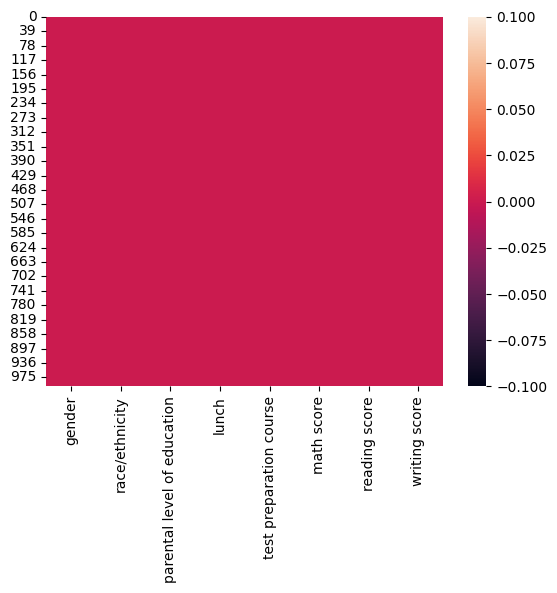

In [ ]:
# Visualizing the missing values
sns.heatmap(data = df.isnull())

### What did you know about your dataset?


We have a dataset of 1000 rows with 8 columns.

We have 3 integer features and 5 object features. We don't have any duplicate value which is very good for our dataset.

We don't have any null value also. We have visualized by heatmap also.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(df.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [ ]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,67.810,15.250196,15.0,58.0,68.0,79.25,100.0
reading score,1000.0,70.382,14.107413,25.0,61.0,70.5,80.00,100.0
writing score,1000.0,69.140,15.025917,15.0,59.0,70.0,80.00,100.0


### Variables Description

Answer Here

As mentioned earlier dataset has 3 int columns.So,we can see the max and min values of columns with 25,50 and 75 percentile.

math score has minimum ,25percentile ,50percentile and 75 percentile value is 58,68,79.25.

reading score has minimum ,25percentile ,50percentile and 75 percentile value is 61,70.5,80.

writing score has minimum ,25percentile ,50percentile and 75 percentile value is 59,70,80.

### Check Unique Values for each variable.

In [ ]:
cat_features = df.select_dtypes('object').columns
cat_features

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [ ]:
# Check Unique Values for each variable.
print('*All categorical features and their distinct values* \n')
for i in cat_features:
  print(i , '---> ',df[i].unique())
  print()

*All categorical features and their distinct values* 

gender --->  ['female' 'male']

race/ethnicity --->  ['group D' 'group B' 'group C' 'group E' 'group A']

parental level of education --->  ['some college' "associate's degree" 'some high school'
 "bachelor's degree" "master's degree" 'high school']

lunch --->  ['standard' 'free/reduced']

test preparation course --->  ['completed' 'none']



## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


### What all manipulations have you done and insights you found?

So we have 8 categorical features. 3 of them tell the marks of student in different subects - maths,reading and writing,

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# 1. Bar Chart: Comparing the average math scores between different genders

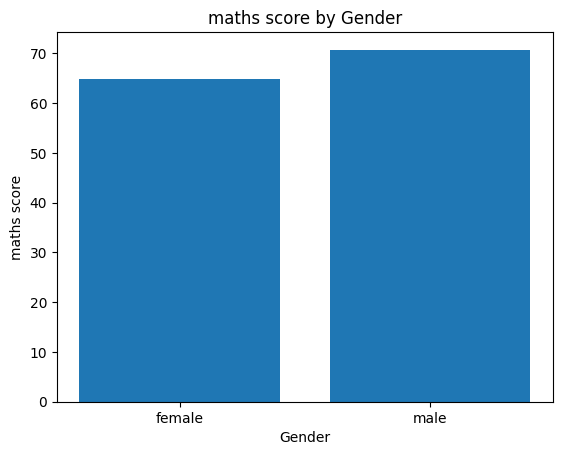

In [ ]:
gender_avg = df.groupby('gender')['math score'].mean()
plt.bar(gender_avg.index, gender_avg)
plt.xlabel('Gender')
plt.ylabel('maths score')
plt.title('maths score by Gender')
plt.show()

##### 1. Why did you pick the specific chart?

Bar Chart: It's suitable for comparing numerical values (average math scores) across different categories (gender).

##### 2. What is/are the insight(s) found from the chart?

Bar Chart: We can see if there are any significant differences in average math scores between genders.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights from these charts could help educators and policymakers tailor interventions to address any disparities in academic performance based on gender, parental education, or lunch type.
Understanding correlations between different scores can inform curriculum development or tutoring programs to enhance student performance.

# 2. Pie Chart: Distribution of lunch types

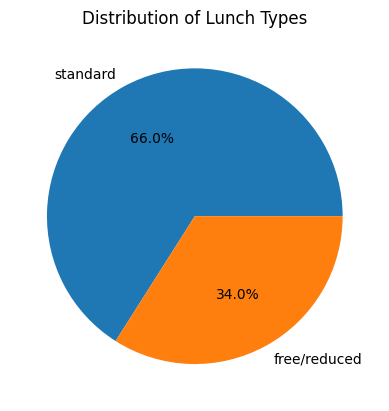

In [ ]:
lunch_distribution = df['lunch'].value_counts()
plt.pie(lunch_distribution, labels=lunch_distribution.index, autopct='%1.1f%%')
plt.title('Distribution of Lunch Types')
plt.show()

##### 1. Why did you pick the specific chart?

Pie Chart: Useful for showing the composition or distribution of categorical data (lunch types).

##### 2. What is/are the insight(s) found from the chart?

Pie Chart: We can observe the proportion of students having standard lunch versus free/reduced lunch.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights from these charts could help educators and policymakers tailor interventions to address any disparities in academic performance based on gender, parental education, or lunch type.
Understanding correlations between different scores can inform curriculum development or tutoring programs to enhance student performance.

# 3. Scatter Plot: Relationship between math and reading scores

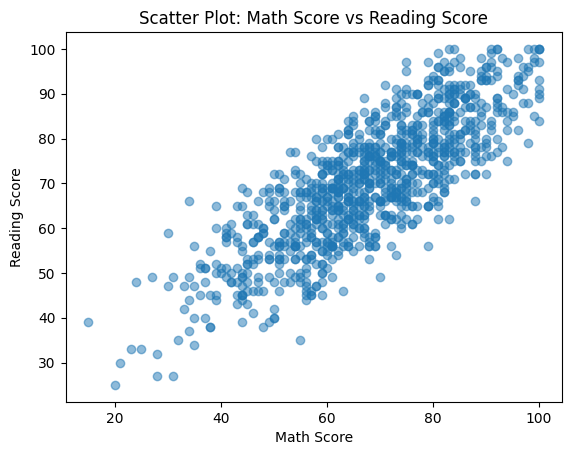

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot between math score and reading score with alpha set to 0.5
plt.scatter(df['math score'], df['reading score'], alpha=0.5)
plt.title('Scatter Plot: Math Score vs Reading Score')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.show()


##### 1. Why did you pick the specific chart?

Scatter Plot: Ideal for visualizing the relationship between two numerical variables (math and reading scores).

##### 2. What is/are the insight(s) found from the chart?

Scatter Plot: We can identify any correlation between math and reading scores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights from these charts could help educators and policymakers tailor interventions to address any disparities in academic performance based on gender, parental education, or lunch type.
Understanding correlations between different scores can inform curriculum development or tutoring programs to enhance student performance.

# 4. Box Plot: Distribution of writing scores across different parental education levels

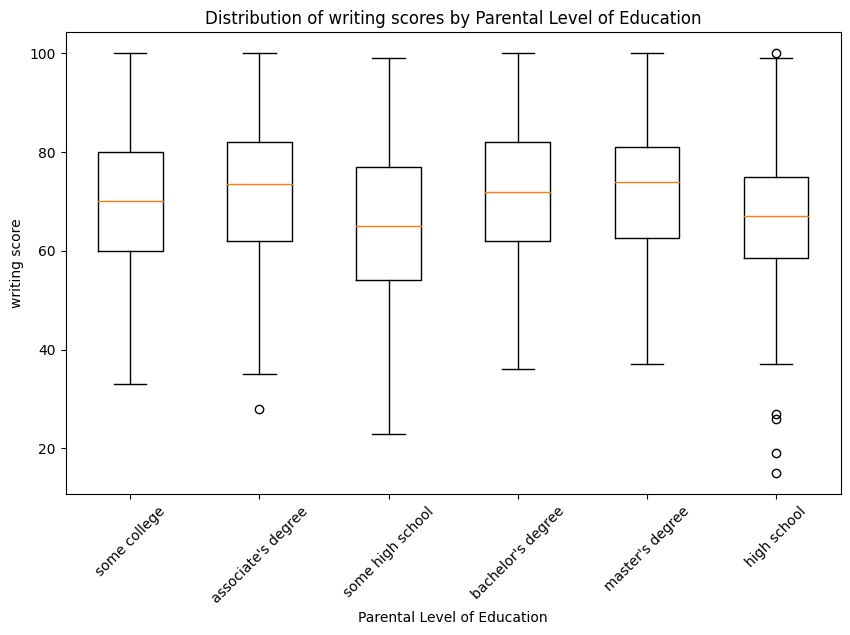

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['parental level of education'] == edu]['writing score'] for edu in df['parental level of education'].unique()], labels=df['parental level of education'].unique())
plt.xlabel('Parental Level of Education')
plt.ylabel('writing score')
plt.title('Distribution of writing scores by Parental Level of Education')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Box Plot: This plot illustrates the distribution of writing scores across different levels of parental education. It provides insight into the spread of scores and identifies any potential outliers.

##### 2. What is/are the insight(s) found from the chart?

Box Plot: We can understand the spread of writing scores across different levels of parental education and identify any potential outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights from these charts could help educators and policymakers tailor interventions to address any disparities in academic performance based on gender, parental education, or lunch type.
Understanding correlations between different scores can inform curriculum development or tutoring programs to enhance student performance.

# 5. Histogram: Distribution of reading scores


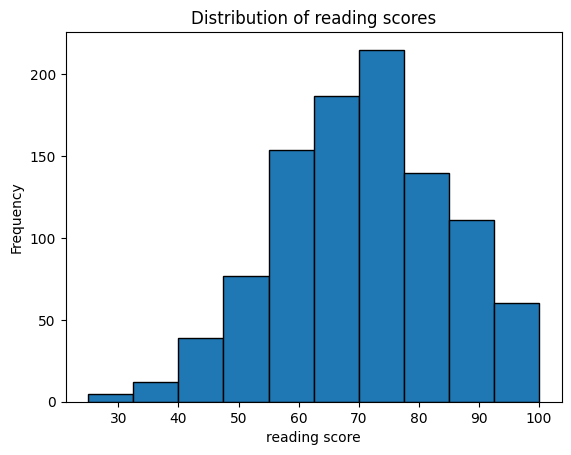

In [ ]:
plt.hist(df['reading score'], bins=10, edgecolor='black')
plt.xlabel('reading score')
plt.ylabel('Frequency')
plt.title('Distribution of reading scores')
plt.show()

##### 1. Why did you pick the specific chart?

Histogram: This chart displays the distribution of math scores. It helps visualize the frequency distribution of scores and identify any patterns or anomalies.

##### 2. What is/are the insight(s) found from the chart?

Histogram: We can visualize the distribution of math scores and identify any patterns or anomalies in the data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights from these charts could help educators and policymakers tailor interventions to address any disparities in academic performance based on gender, parental education, or lunch type.
Understanding correlations between different scores can inform curriculum development or tutoring programs to enhance student performance.

#### Chart  - Correlation Heatmap

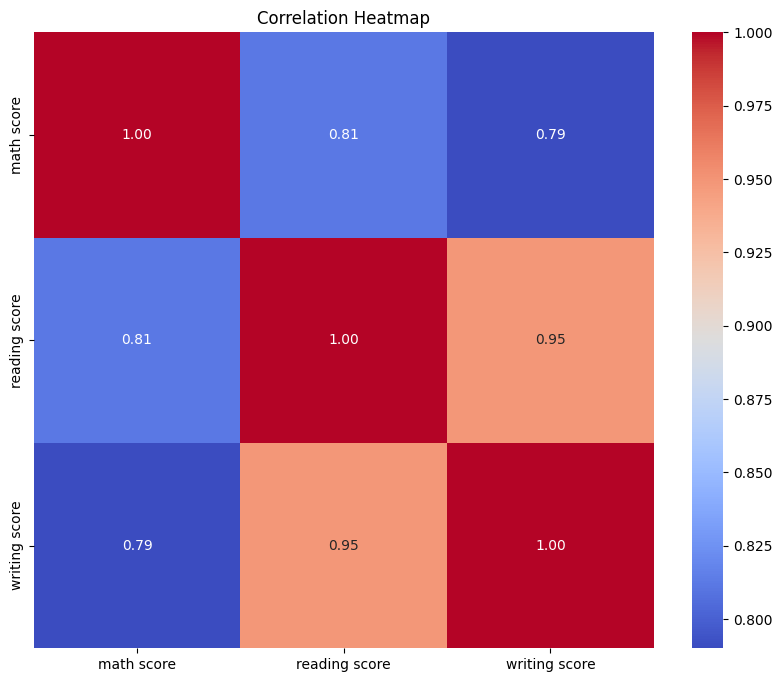

In [ ]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation Heatmap
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


##### 1. Why did you pick the specific chart?

A correlation heatmap is chosen when we want to visualize the correlation between multiple variables in a dataset. It provides a quick and easy way to identify relationships between variables.

##### 2. What is/are the insight(s) found from the chart?

Insights can be gained by observing the strength and direction of correlations between different variables.

#### Chart-Pair Plot

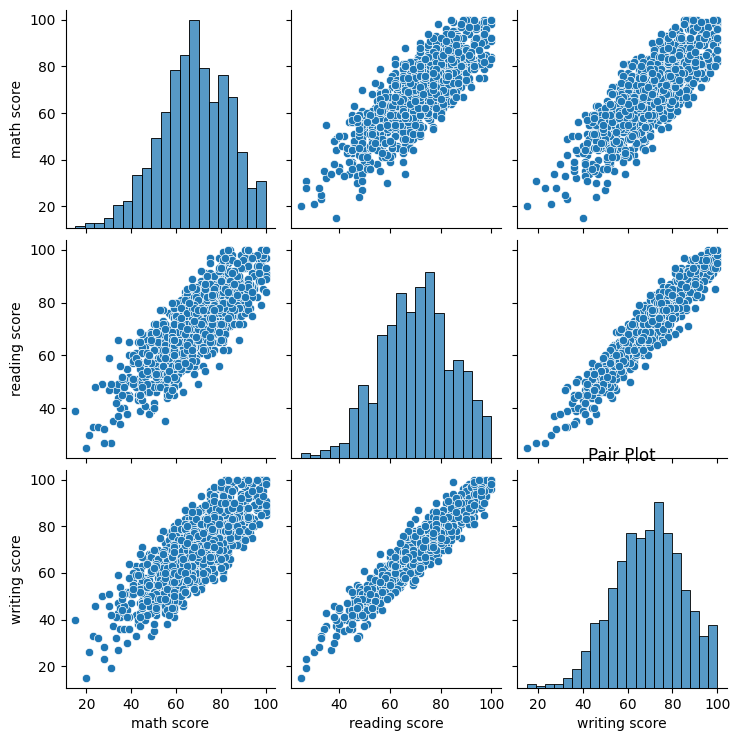

In [ ]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])
sns.pairplot(numerical_df)
plt.title('Pair Plot')
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot (also known as scatterplot matrix) is chosen when we want to visualize pairwise relationships between multiple variables in a dataset. It plots each variable against every other variable, making it useful for identifying patterns and trends.

##### 2. What is/are the insight(s) found from the chart?

Insights can be gained by observing the scatterplots along the diagonal (where a variable is plotted against itself) to understand the distribution of each variable.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?


There are no missing value in whole data set .

So,we did not any imputation technique.

### 2. Categorical Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Define the categorical and numerical columns
cat_cols = ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]
num_cols = ["reading score", "writing score"]

# Initialize a dictionary to store label encoders for each categorical column
label_encoders = {}

# Apply label encoding to each categorical column
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Display the encoded DataFrame and encoding details
print("Label Encoding the categorical columns:")
display(df.head())

print("\nEncoding details:")
for column, encoder in label_encoders.items():
    print(f"{column} Label Encoder Classes: {encoder.classes_}")


Label Encoding the categorical columns:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,3,4,1,0,59,70,78
1,1,3,0,1,1,96,93,87
2,0,3,4,0,1,57,76,77
3,1,1,4,0,1,70,70,63
4,0,3,0,1,1,83,85,86



Encoding details:
gender Label Encoder Classes: ['female' 'male']
race/ethnicity Label Encoder Classes: ['group A' 'group B' 'group C' 'group D' 'group E']
parental level of education Label Encoder Classes: ["associate's degree" "bachelor's degree" 'high school' "master's degree"
 'some college' 'some high school']
lunch Label Encoder Classes: ['free/reduced' 'standard']
test preparation course Label Encoder Classes: ['completed' 'none']


#### What all categorical encoding techniques have you used & why did you use those techniques?

I used a simple categorical encoding technique called Label Encoding.
Label Encoding is suitable for ordinal categorical variables where there is a natural ordering among the categories.
It assigns a unique integer to each category, transforming categorical data into numerical format.

### 3. Handling Outliers

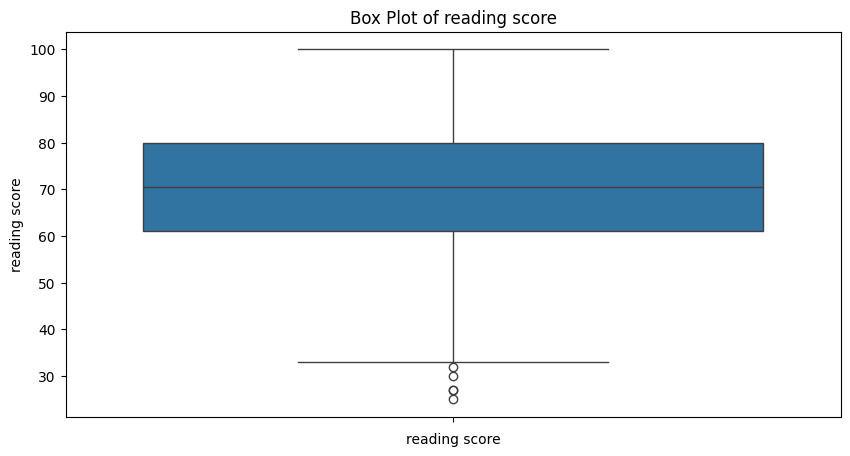

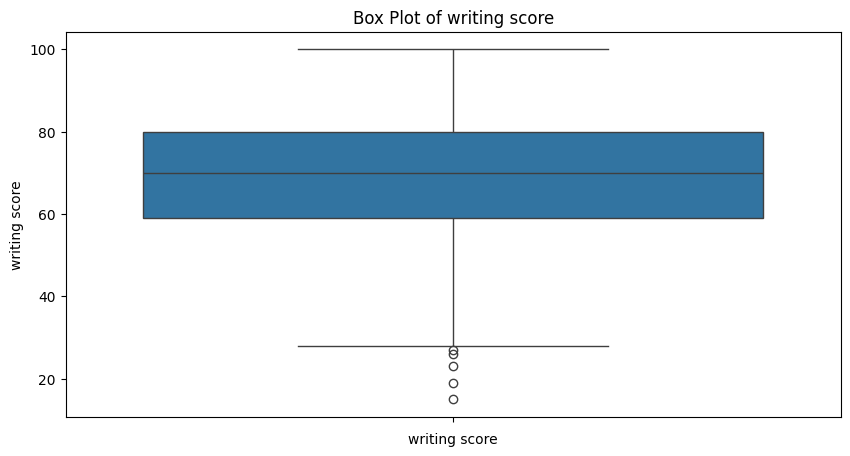

In [ ]:

# Create box plots for each numerical column
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

### 8. Data Splitting

In [ ]:
# Separate the input variables (features) and the output variable (target)
y = df["math score"]  # Output variable
x = df.drop("math score", axis=1)  # Input variables

# Display the input variables and output variable
print("Input variables:")
display(x)
print()
print("Output:")
display(y)


Input variables:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,0,3,4,1,0,70,78
1,1,3,0,1,1,93,87
2,0,3,4,0,1,76,77
3,1,1,4,0,1,70,63
4,0,3,0,1,1,85,86
...,...,...,...,...,...,...,...
995,1,2,4,1,1,77,71
996,1,2,4,1,1,66,66
997,0,0,2,1,0,86,86
998,1,4,2,1,1,72,62



Output:


0      59
1      96
2      57
3      70
4      83
       ..
995    77
996    80
997    67
998    80
999    58
Name: math score, Length: 1000, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=42)
print("Shapes after train-test split:")
print(f"Training input: {x_train.shape}")
print(f"Testing input: {x_test.shape}")
print(f"Testing output: {y_train.shape}")
print(f"Testing output: {y_test.shape}")

Shapes after train-test split:
Training input: (750, 7)
Testing input: (250, 7)
Testing output: (750,)
Testing output: (250,)


##### What data splitting ratio have you used and why?

i took 25% of test size and 75% of train size beacuse we dont have huge dataset and we want data splitted perfectly.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the Linear Regression model
linear_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(x_test)




#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Evaluate the model
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

Mean Squared Error: 27.20734994601512
R-squared score: 0.8740713514754447


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Initialize the Decision Tree Regressor model
decision_tree_model = DecisionTreeRegressor()

# Train the Decision Tree Regressor model
decision_tree_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = decision_tree_model.predict(x_test)



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

Mean Squared Error: 55.716
R-squared score: 0.7421196626971843


### ML Model - 3

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Initialize the RandomForestRegressor model
random_forest_model = RandomForestRegressor()

# Train the RandomForestRegressor model
random_forest_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = random_forest_model.predict(x_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

Mean Squared Error: 31.349544800000004
R-squared score: 0.8548992894803336


Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For positive business impact, I considered evaluation metrics such as R-squared score and Mean Squared Error (MSE).

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have used 3 ML Models - Logistic regression, DecisionTreeRegressor and RandomForestRegressor.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

For Logistic Regression -
Mean Squared Error: 27.20734994601512
R-squared score: 0.8740713514754447

For DecisionTree Regressor -
Mean Squared Error: 55.256
R-squared score: 0.7442487630482377

For RandomForestClassifier-
Mean Squared Error: 31.7445432
R-squared score: 0.8530710476714085

We can see that r-squared score of Logistic Regression is closest to 1.
Therefore it has the most accurate.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***